In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf

In [3]:
train_dir = '/content/drive/My Drive/plantdata/train'
test_dir = '/content/drive/My Drive/plantdata/test'
val_dir='/content/drive/My Drive/plantdata/val'

In [4]:
img_size = (224, 224)
batch_size = 32

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)
test_dataset=tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="int",
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int',
    shuffle=False
)



Found 3251 files belonging to 4 classes.
Found 697 files belonging to 4 classes.
Found 697 files belonging to 4 classes.


In [5]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))


In [6]:
from tensorflow.keras import layers,models

In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(4, activation='softmax')  # 4 classes: Apple_scab, Black_rot, Cedar_apple_rust, healthy
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy if labels are integers
    metrics=['accuracy']
)


In [9]:
history = model.fit(
    train_dataset,
    epochs=25,
    validation_data=val_dataset  # Use the validation data for evaluation during training
)

Epoch 1/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 341s 3s/step - accuracy: 0.5862 - loss: 0.9699 - val_accuracy: 0.8551 - val_loss: 0.3877
Epoch 2/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - accuracy: 0.8617 - loss: 0.3924 - val_accuracy: 0.9197 - val_loss: 0.2223
Epoch 3/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.9103 - loss: 0.2663 - val_accuracy: 0.8737 - val_loss: 0.3169
Epoch 4/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - accuracy: 0.8965 - loss: 0.2838 - val_accuracy: 0.9268 - val_loss: 0.2141
Epoch 5/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 0.9426 - loss: 0.1615 - val_accuracy: 0.9440 - val_loss: 0.1527
Epoch 6/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.9408 - loss: 0.1643 - val_accuracy: 0.9240 - val_loss: 0.2267
Epoch 7/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9552 - loss: 0.1174 - val_accuracy: 0.9139 - val_loss: 0.3464
Epoch 8/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.9568 - loss: 0.1

In [10]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.2f}")


22/22 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.9510 - loss: 0.2756
Test Accuracy: 0.94


In [11]:
model.save('/content/drive/My Drive/plantdata/model_apple.h5')


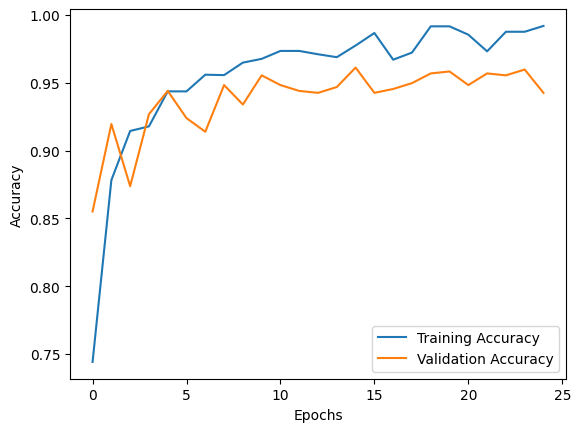

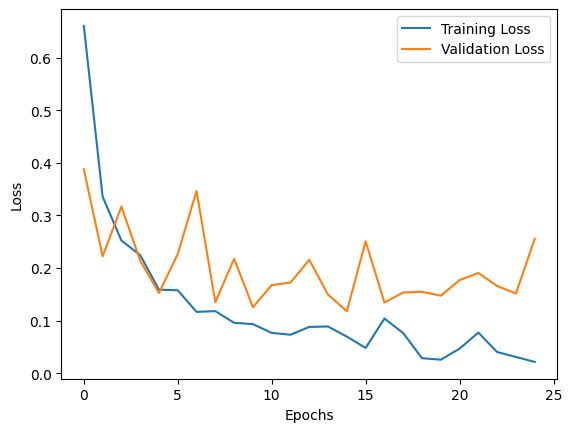

In [12]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Define the class names based on your directory structure
class_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']

def predict_image(image_path, model):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions, axis=-1)[0]
    predicted_class = class_names[predicted_class_idx]
    confidence = np.max(predictions)

    return predicted_class, confidence

# Example prediction
image_path = 'a1.jpg'  # Replace with the path to your image
predicted_class, confidence = predict_image(image_path, model)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class: Apple___Apple_scab, Confidence: 1.00
